In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# FRAUD DETECTION
In this assignment, we have a data set for fraud detection. While being designed as an end-to-end machine learning project, the following questions will be answered respectively.

1-) How is one hot encoding applied to data that the model does not see?

2-) How to scale for related column in Labelencoding?
(Digital conversion of data with the right effect)

3-) What should we consider when doing a train test split on an Imbalance dataset?

4-) How to create a validation dataset (that the model does not see) and make it ready to predict?

5-) How to calculate ratio and change tHreshold with predict_proba method?

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("auto_insurance_csv.csv")
df

,Unnamed: 0,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,0,328,48.0,521585,2014-10-17,OH,250/500,1000,1406.91,0.0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,1,228,42.0,342868,2006-06-27,IN,250/500,2000,1197.22,5000000.0,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,2,134,29.0,687698,2000-09-06,OH,NaN,2000,1413.14,5000000.0,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NaN,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,3,256,41.0,227811,1990-05-25,IL,NaN,2000,1415.74,6000000.0,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,4,228,44.0,367455,2014-06-06,IL,NaN,1000,1583.91,6000000.0,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NaN,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,3,38.0,941851,1991-07-16,OH,NaN,1000,1310.80,0.0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,996,285,41.0,186934,2014-01-05,IL,NaN,1000,1436.79,NaN,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,997,130,NaN,918516,2003-02-17,OH,250/500,500,1383.49,3000000.0,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,NaN,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,998,458,62.0,533940,2011-11-18,IL,500/1000,2000,1356.92,NaN,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


## Determining Null Values ​​and Filling These Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1000 non-null   int64  
 1   months_as_customer           1000 non-null   int64  
 2   age                          865 non-null    float64
 3   policy_number                1000 non-null   int64  
 4   policy_bind_date             1000 non-null   object 
 5   policy_state                 1000 non-null   object 
 6   policy_csl                   127 non-null    object 
 7   policy_deductable            1000 non-null   int64  
 8   policy_annual_premium        1000 non-null   float64
 9   umbrella_limit               802 non-null    float64
 10  insured_zip                  1000 non-null   int64  
 11  insured_sex                  1000 non-null   object 
 12  insured_education_level      1000 non-null   object 
 13  insured_occupation 

As seen above, there are null values ​​in the columns. These values ​​will be populated with the same values ​​for comparison with the models in the shared Auto Insurence Fraud notebook.

In [4]:
#umbrella_limit kolonundaki null değerler 9999 sayısıyla doldurulmaktadır ve 
#sayısal değerler other isimli bir değişkende toplanmaktadır
df['umbrella_limit'] = df.umbrella_limit.fillna("9999")
df['umbrella_limit'] = df.umbrella_limit.astype(str)
umbrealla = df['umbrella_limit'].unique()
for umb in umbrealla:
    if (umb != '0.0') & (umb != '9999'):
        df['umbrella_limit'] = df['umbrella_limit'].str.replace(umb, 'other')

#police_report_available kolonundaki null değerler MISSING olarak değiştirilmektedir.
df['police_report_available'] = df.police_report_available.fillna("MISSING")

#policy_csl kolonundaki null değerler MISSING olarak değiştirilmektedir.
df['policy_csl'] = df.policy_csl.fillna("MISSING")

#policy_bind_date ve incident_date kolonundaki değerler tarih değerlerine dönüştürülür ve 
#birbirlerinden çıkarılarak claim_day_of_policy adında bir kolon oluşturulur.
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['claim_day_of_policy'] = (df.incident_date -  df.policy_bind_date).dt.days

#location_check adlı bir kolon oluşturulur. Bu kolon poliçenin hazırlandığı yer ve kazanın yaşandığı yerin birbiriyle 
#aynı olup olmadığını kontrol eden bool bir kolon oluşturur.
df['location_check'] = np.nan
df['location_check'] = np.where(df['policy_state'] == df['incident_state'], True, False)

#Buradan itibaren gruplamalar yapılmıştır.

#age kolonunun null değerleri 9999 değeriyle doldurulur ve age_group adında yeni bir kolon oluşturularak
#yaş değerleri 5'er yıllık gruplara bölünmüştür.
df['age'] = df.age.fillna(9999)
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65','9999']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 9999]
df['age_group'] = pd.cut(df['age'], bins = bins, labels = bin_labels, include_lowest = True)

#months_as_customer kolonu, months_as_customer_groups adında kişinin kaç aydır müşteri olduğunun
#gruplandığı bir kolona dönüştürülmüştür.
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']
df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)

#policy_annual_premium kolonu, policy_annual_premium_groups adında poliçenin kalitesinin gruplandığı bir kolona dönüşmüştür
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']
df['policy_annual_premium_groups'] = pd.cut(df['policy_annual_premium'], bins = bins, labels=bin_labels)

bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']
df['policy_deductable_group'] = pd.cut(df['policy_deductable'], bins = bins, labels = bin_labels)

#fraud_reported kolonuna elle bir label encoding işlemi uygulanmıştır.
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)

## Visualization

Here, the relationship of the columns that we have reconstructed by grouping their values ​​with the ***fraud_reported*** column is examined.


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

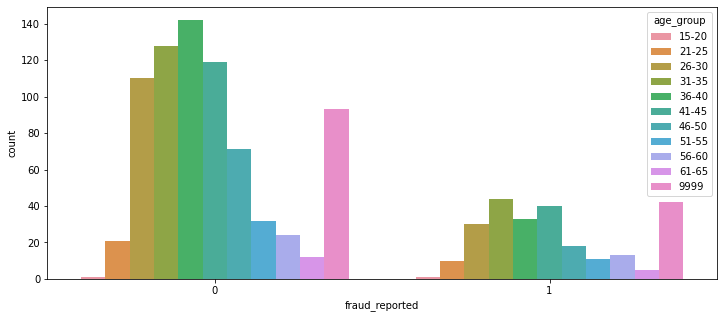

In [5]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['fraud_reported'],hue='age_group',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

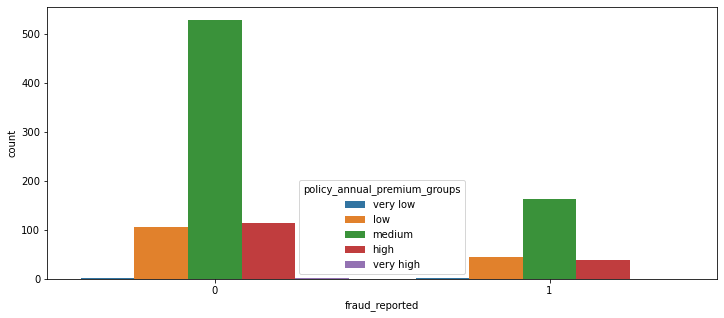

In [6]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['fraud_reported'],hue='policy_annual_premium_groups',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

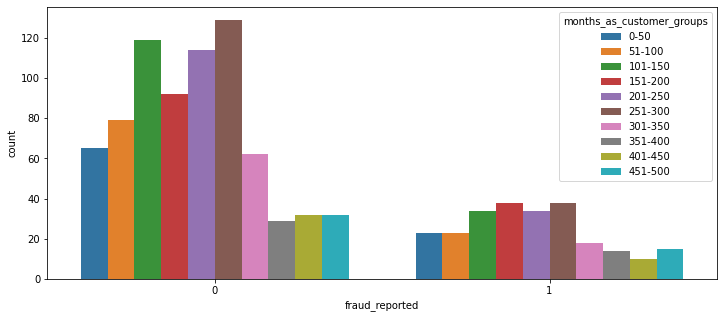

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['fraud_reported'],hue='months_as_customer_groups',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

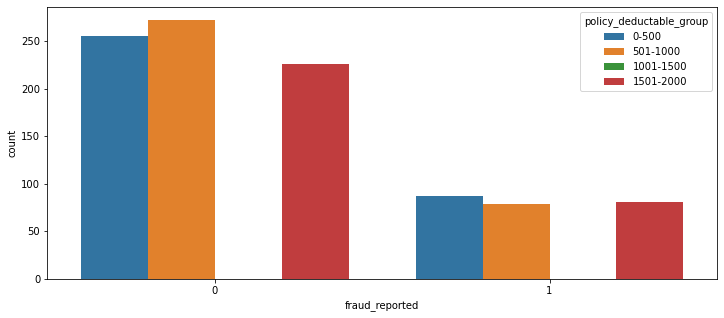

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['fraud_reported'],hue='policy_deductable_group',data=df)

- Considering the age groups, although the number of frauds among young people is high, it is seen that people aged 46 and above are more involved in fraud than expected.
- Looking at the insurance package information, it is seen that those who buy medium-level packages are more likely to commit fraud. From the information in the same chart, it is also revealed that the majority of them prefer the mid-level package more.
- The fraud rate is higher for those who have been a customer for 8 and 25 years during the month spent as a customer. The reason for this is the large number of people who became customers during this period.
- Insurance deductible means the fee received before taking out insurance. The higher this fee, the more the insurance company pays after an accident. In this chart, the group that pays this fee at the lower limit is more involved in fraud.

Multicollinearity problem is seen in the heatmap printed after the data is filled.

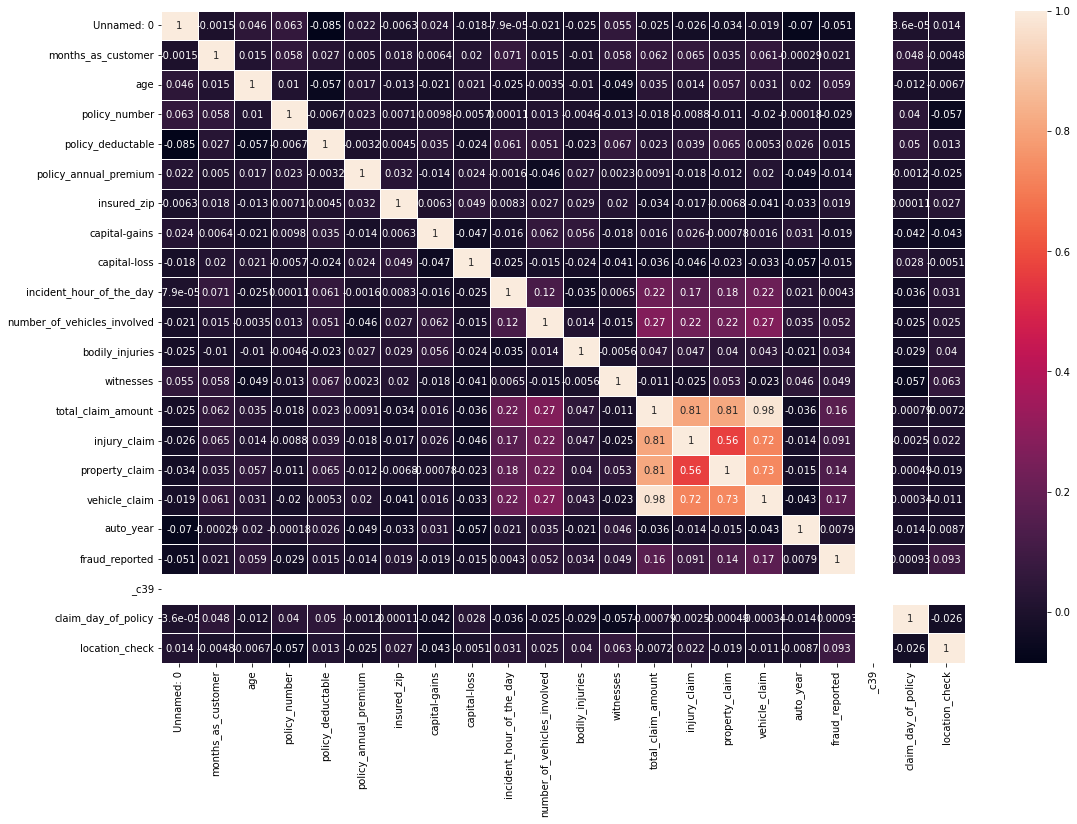

In [9]:
plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

## Multicollinearity

In short, multicollinearity is the situation where there is a very high correlation between at least two variables that predict a variable. Since two variables with a very high relationship between them will be partially similar to each other, it would be appropriate to discard either of them.

In [10]:
Image(url= "images/multicollinearity.png", width=600, height=600)

In order to determine this numerically, Variance Inflation Factor (variance increase factor) should be calculated.

## Variance Inflation Factor(VIF)

VIF is an index that measures how much the variance of a variable to be estimated has increased due to ***collinearity***.
- Collinearity defines the linear relationship between two variables. Unlike multicollinearity, it does not show multicollinearity.

After calculating the VIF, the values ​​are analyzed as follows:
- VIF=1 NO multicollinearity.

- VIF=<5 low multicollinearity or partial correlation

- VIF=>5 high multicollinearity or high korelasyon

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#nümerik kolonların seçilmesi
num_cols0 = df[list(df.select_dtypes(include=['int64']))]

#nümerik kolonların VIF değerlerini göstermek için farklı bir dataFrame oluşturulması ve değerlerin yazdırılması
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(num_cols0.values, i) for i in range(num_cols0.shape[1])]
vif_info['Column'] = num_cols0.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
11,inf,total_claim_amount
14,inf,vehicle_claim
13,inf,property_claim
12,inf,injury_claim
15,76.553317,auto_year
4,50.262967,insured_zip
2,5.576955,policy_number
8,4.666654,number_of_vehicles_involved
3,4.598610,policy_deductable
1,4.226370,months_as_customer


According to these results, there are ***infinite**** values ​​in 4 columns. This is called **Perfect Correlation**. The reason is that these 4 columns are highly related to each other. We can solve this problem by discarding the columns. First, let's show that the vehicle_claim, property_claim, and property_claim columns are equal to the total_claim_amount column.

In [12]:
df["Total"] = df["vehicle_claim"] + df["property_claim"] + df["injury_claim"]
df.Total.sum()

52761940

In [13]:
df.total_claim_amount.sum()

52761940

As can be seen here, discarding these 3 columns and leaving only the total_claim_amount column will solve the infinite problem. Any other columns deemed unnecessary will also be discarded.

In [14]:
#multicollinearity düzenlemesi için atıldı
df = df.drop(['vehicle_claim', 'property_claim', 'injury_claim', 'Total', 'auto_year', 'insured_zip'], axis = 1)

#claim_day_of_policy kolonu oluşturulduğu için atıldı
df = df.drop(['policy_bind_date','incident_date'],axis=1)

#sadece null değerler var
df = df.drop(['_c39','Unnamed: 0'], axis = 1)

#bu kolonlarda gruplama yapıldığı için atıldılar.
df = df.drop(['age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium'], axis = 1)

#policy_number kolonu modeli eğitirken önemsiz olduğu için atıldı
df = df.drop(['policy_number'], axis = 1)

- When we print the VIF values ​​again, we see that the infinite problem in the total_claim_amount column is fixed and the columns with high VIF values ​​are discarded.
- We also check again that the null values ​​are cleared.

In [15]:
#nümerik kolonların VIF değerlerini göstermek için farklı bir dataFrame oluşturulması ve değerlerin yazdırılması
num_cols0 = df[list(df.select_dtypes(include=['int64']))]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(num_cols0.values, i) for i in range(num_cols0.shape[1])]
vif_info['Column'] = num_cols0.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
6,5.145819,total_claim_amount
3,4.221476,number_of_vehicles_involved
2,3.619873,incident_hour_of_the_day
7,3.135658,claim_day_of_policy
5,2.445818,witnesses
4,2.278841,bodily_injuries
1,1.851825,capital-loss
0,1.758249,capital-gains


In [16]:
df.isnull().sum()

policy_state                    0
policy_csl                      0
umbrella_limit                  0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted           0
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
auto_make                       0
auto_model                      0
fraud_reported                  0
claim_day_of_policy             0
location_check                  0
age_group     

# QUESTION 1

**How is one hot encoding applied to data that the model does not see?**

In order to prepare the data for encoding, it is necessary to convert the data type ***object*** into ***category*** first. There are several reasons for this:
- Category data type is much more suitable for memory optimization. This saves time when training the model.
- The word order of a variable is not the same as the logical order. By converting to category and specifying an order on the categories, it will use the logical order instead of the dictionary order.

In [17]:
#Seçilen kolonların category veri tipine dönüştürülmesi
for col in [ 'policy_state','umbrella_limit', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship',
            'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location',
             'property_damage',  'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']:
    df[col] = df[col].astype('category')

In [18]:
#Kolon veri tipleri dönüştürüldü
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   policy_state                  1000 non-null   category
 1   policy_csl                    1000 non-null   category
 2   umbrella_limit                1000 non-null   category
 3   insured_sex                   1000 non-null   category
 4   insured_education_level       1000 non-null   category
 5   insured_occupation            1000 non-null   category
 6   insured_hobbies               1000 non-null   category
 7   insured_relationship          1000 non-null   category
 8   capital-gains                 1000 non-null   int64   
 9   capital-loss                  1000 non-null   int64   
 10  incident_type                 1000 non-null   category
 11  collision_type                1000 non-null   category
 12  incident_severity             1000 non-null   cat

When one hot encoding is applied on categorical data, a numerical irregularity occurs in the data in the train and test data sets. In addition, it can cause multicollinearity again. To overcome these situations, ***Pipeline*** will be used.

## Pipeline

- Pipeline is not actually a data science concept but a very basic computer architecture and systems programming concept. It allows multiple jobs to be run simultaneously in parallel.
- The concept we define as work here is called ***process(task)*** with the system programming term and it is actually aimed to use the CPU as much as possible.
- Different CPU sharing methods used depending on the characteristics of the processes are called job sequencing algorithms.
- ***In the picture below, a pipeline structure that processes 5 different processes in parallel at t time is seen.***

In [19]:
Image(url= "images/pipeline.jpg", width=600, height=600)

- The Scikit Learn library has also created a Pipeline structure by taking this structure as an example. It allows the desired operations (StandardScaler, OneHotEncoder, LabelEncoder) to run parallel to each other by giving an object named ***column_transformer*** inside. It also prevents possible errors.
- **Pipeline structure will be shown with answering question 2.**

# QUESTION 2

**How to scale for the relevant column in Label Encoding? (Digital conversion of data with the right effect)**

- Label Encoding is an encoding process that numbers categorical data from 0 to ***n*** since the model training process is performed on numerical data.
- The biggest problem with this type of encoding is that each categorical data does not have an order or weight.
- For this, ordinal data must be used. We will use the ***policy_annual_premium_groups*** column for this process.
- In addition, while encoding, it does this according to the alphabetical order of the values ​​in the column. What we want is to be able to renumber in a logical order.
- For this, we can do ***Ordinal Encoding*** and assign our values ​​manually.

In [20]:
#Bu kolon ordinal değerler içermekte ve veri setinde ordinal encoding'e en uygun kolondur.
df[["policy_annual_premium_groups"]]

,policy_annual_premium_groups
0,medium
1,medium
2,medium
3,medium
4,high
...,...
995,medium
996,medium
997,medium
998,medium


The 5 values ​​in this column are also shown. If label encoding was done, numeric values ​​from 0 to 4 would be assigned to the first printed list, but since the data type is converted to categorical, the logical relationship between them is shown in the line below.

In [21]:
df.policy_annual_premium_groups.unique()

['medium', 'high', 'low', 'very high', 'very low']
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very high']

Manually ordinal encoding is done simply with the map() function. The same can be done from the scikit learn library.

In [22]:
df["policy_annual_premium_groups_encoded"] = df["policy_annual_premium_groups"].map(
    {'very low':1, 'low':2, 'medium':3, 'high':4, 'very high':5})

In [23]:
#Veriler istediğimiz şekilde encode edildi
df[["policy_annual_premium_groups", "policy_annual_premium_groups_encoded"]]

,policy_annual_premium_groups,policy_annual_premium_groups_encoded
0,medium,3
1,medium,3
2,medium,3
3,medium,3
4,high,4
...,...,...
995,medium,3
996,medium,3
997,medium,3
998,medium,3


In [24]:
#kategorik verileri içeren verilerin düşürülmesi
df = df.drop(['policy_annual_premium_groups'], axis = 1)

The pipeline structure mentioned in the first question can now be created. First, a column_transformer object will be defined and printed into the StandardScaler and OneHotEncoder processes. For this, categorical and numeric columns must be printed first.

In [25]:
#kategorik kolonların yazdırılması. burada policy_annual_premium_groups_encoded kolonu gözükmekte ama 
#zaten ordinal encoding yapıldığı için column_transformer'da işleme katılmayacaktır.
cat_cols = df.select_dtypes(include=['category'])
cat_cols.columns

Index(['policy_state', 'policy_csl', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model', 'fraud_reported',
       'age_group', 'months_as_customer_groups', 'policy_deductable_group',
       'policy_annual_premium_groups_encoded'],
      dtype='object')

In [26]:
#numerik kolonların yazdırılması.
num_cols = df.select_dtypes(include=['int64'])
num_cols.columns

Index(['capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'claim_day_of_policy'],
      dtype='object')

In [27]:
#column_transformer nesnesinin oluşturulması. burada OneHotEncoder içerisindeki handle_unknown parametresi
#verilerin tekrar ederek shape error vermesi engellenecektir.
column_trans = make_column_transformer(
               (StandardScaler(), ['capital-gains', 'capital-loss',
                                   'incident_hour_of_the_day', 'number_of_vehicles_involved',
                                   'bodily_injuries', 'witnesses', 'total_claim_amount',
                                   'claim_day_of_policy'
                                   ]),
               (OneHotEncoder(handle_unknown="ignore"), ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
                                   'insured_occupation', 'insured_hobbies', 'insured_relationship',
                                   'incident_type', 'collision_type', 'incident_severity',
                                   'authorities_contacted', 'incident_state', 'incident_city',
                                   'incident_location', 'property_damage', 'police_report_available',
                                   'auto_make', 'auto_model', 'age_group',
                                   'months_as_customer_groups',
                                   'policy_deductable_group', 'umbrella_limit']),
               remainder="passthrough")

Now we can move on to the model training phase. Logistic Regression was chosen for the first training phase.

In [28]:
X = df.drop("fraud_reported", axis="columns")
y = df.fraud_reported

When the column_trans object is fit_transformed, it prints the information that it holds a matrix with 31009 values ​​of (1000,1184).

In [29]:
column_trans.fit_transform(X, y)

<1000x1184 sparse matrix of type '<class 'numpy.float64'>'
	with 31009 stored elements in Compressed Sparse Row format>

In [30]:
#train ve test veri setlerinin ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [31]:
#Mantıksal regresyon modelinin çağırılması
log_reg = LogisticRegression(random_state=42)

In [32]:
#pipeline yapısı kurulumu. bu şekilde column_trans içerisindeki çok sayıda veri hızlı bir şekilde eğitilecektir.
pipe_log_reg = make_pipeline(column_trans, log_reg)

In [33]:
#artık model yerine pipe değişkenini verebiliriz
pipe_log_reg.fit(X_train, y_train)
preds = pipe_log_reg.predict(X_test)

#Mantıksal regresyon skorunun yazdırılması
score = pipe_log_reg.score(X_test, y_test)
print(score*100)

76.8


The first model was trained by printing the last information.

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       183
           1       0.60      0.42      0.49        67

    accuracy                           0.77       250
   macro avg       0.70      0.66      0.67       250
weighted avg       0.75      0.77      0.75       250



<AxesSubplot:>

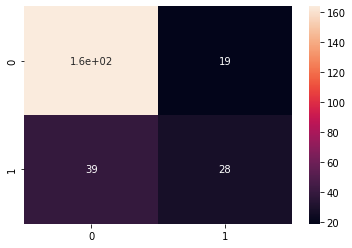

In [34]:
#evaluation metriklerinin yazdırılması ve heatmap
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

# QUESTION 3

**What should we consider when doing a train test split on an Imbalance dataset?**

First of all, it should be checked whether there is an imbalance in the data to be examined.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

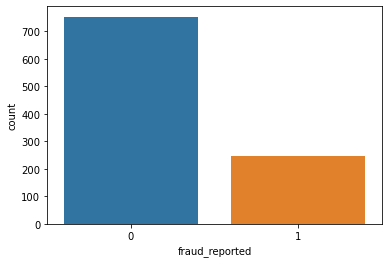

In [35]:
sns.countplot(df['fraud_reported'])

Imbalance data are very common in ***fraud detection, cancer cell prediction, or intrusion detection in networks*** datasets. But most machine learning algorithms do not work correctly on imbalanced datasets. Therefore, an editing process is required. There are several methods for editing Imbalance datasets:
- **Under sampling majority class**: It is the use of less of the values ​​of the majority class. But it is not recommended as there will be a lot of data loss.
- **Over sampling minorty class by duplication**: It means copying the data of the minor cluster to be equal to the number of data of the major cluster.
- **Over sampling minorty class using SMOTE**: It is over-sampling using the K-Nearest Neighbors algorithm. Here, instead of copying the same data, the minor cluster data is filled by taking their neighborhood.
- **Ensemble Method**: The best of these models is selected by dividing the clusters into equal parts that can be divided (for example, in the data set we have, we can divide the major cluster 3 times to equal the minor cluster) and train the models.

## Undersampling
Undersampling will be attempted first. For this, functions from the ***imblearn*** library will be called and how the results change will be examined.

In [36]:
#undersample yapmak için ayırdığımız X_train ve y_train ögelerini tekrar ayırırız.
rus = RandomUnderSampler(random_state=42, replacement=True)
X_under, y_under = rus.fit_resample(X_train, y_train)

X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under, y_under, test_size = 0.3, random_state = 42)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

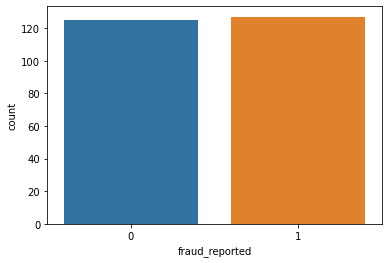

In [37]:
#kontrol sonucu majör ve minör kümelerin düşük bir değerde eşitlendiği görülmektedir.
chck2 = pd.DataFrame()
chck2['fraud_reported'] = y_train_u

sns.countplot(chck2['fraud_reported'])

For comparison, the logistic regression model was trained again.

In [38]:
#artık model yerine pipe değişkenini verebiliriz
pipe_log_reg.fit(X_train_u, y_train_u)
preds = pipe_log_reg.predict(X_test_u)

#mantıksal regresyon skorunun yazdırılması
score = pipe_log_reg.score(X_test_u, y_test_u)
print(score*100)

79.62962962962963


As a result of training the model, the fraud prediction rate and overall score increased, but the reliability rate decreased as the number of data of the model decreased. So oversampling should also be tried.

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        55
           1       0.78      0.81      0.80        53

    accuracy                           0.80       108
   macro avg       0.80      0.80      0.80       108
weighted avg       0.80      0.80      0.80       108



<AxesSubplot:>

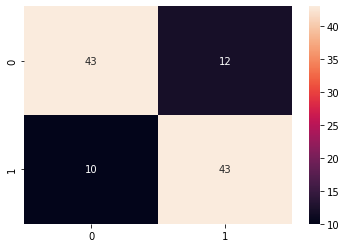

In [39]:
#evaluation metriklerinin yazdırılması ve heatmap
print(classification_report(y_test_u, preds))
cm = confusion_matrix(y_test_u, preds)
sns
sns.heatmap(cm, annot=True)

## Oversampling

RandomOverSampler from the imblearn library will be used here.

In [40]:
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_train, y_train)

In [41]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size = 0.3, random_state = 42)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

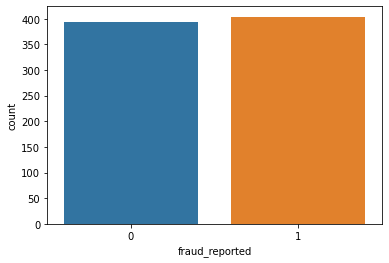

In [42]:
chck2 = pd.DataFrame()
chck2['fraud_reported'] = y_train_o

sns.countplot(chck2['fraud_reported'])

In [43]:
#artık model yerine pipe değişkenini verebiliriz
pipe_log_reg.fit(X_train_o, y_train_o)
preds = pipe_log_reg.predict(X_test_o)

#Mantıksal regresyon skorunun yazdırılması
score = pipe_log_reg.score(X_test_o, y_test_o)
print(score*100)

90.05847953216374


              precision    recall  f1-score   support

           0       0.94      0.86      0.90       176
           1       0.86      0.95      0.90       166

    accuracy                           0.90       342
   macro avg       0.90      0.90      0.90       342
weighted avg       0.90      0.90      0.90       342



<AxesSubplot:>

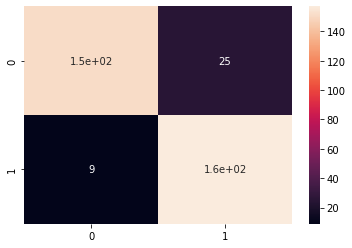

In [44]:
#evaluation metriklerinin yazdırılması ve heatmap
print(classification_report(y_test_o, preds))
cm = confusion_matrix(y_test_o, preds)
sns
sns.heatmap(cm, annot=True)

# QUESTION 4

**How ​​to create a validation dataset (which the model does not see) and how to make it ready to predict?**

Creating a validation dataset means dividing the dataset into three as train, validation and test. First, the train dataset is arranged and the model is selected on the validation dataset. Then the most suitable model is tried again on the test dataset and the results are compared.
- It is sufficient to call train_test_split 2 times to create a validation dataset. Splitting datasets was determined according to the image.

In [45]:
Image(url= "images/val.png", width=600, height=600)

In [46]:
#verisetinin 3 farklı gruba bölünmesi
X_train_val, X_test, y_train_val, y_test = train_test_split(X_over, y_over, test_size = 0.4)
relative_train_size = 0.6 / ((0.4/0.5) + 0.6)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  train_size = relative_train_size, test_size = 1-relative_train_size)

In [47]:
X_val

,policy_state,policy_csl,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_deductable_group,policy_annual_premium_groups_encoded
1006,IN,MISSING,0.0,MALE,High School,exec-managerial,paintball,husband,69500,-40700,Single Vehicle Collision,Rear Collision,Major Damage,Other,SC,Columbus,8493 Apache Drive,16,1,?,1,1,?,74800,Ford,Fusion,3691,False,41-45,251-300,0-500,3
672,IN,MISSING,9999,FEMALE,MD,tech-support,kayaking,not-in-family,49100,-45100,Parked Car,?,Trivial Damage,Police,WV,Northbrook,8492 Weaver Hwy,5,1,YES,1,2,?,100,Audi,A3,6,False,31-35,51-100,1501-2000,3
250,IN,MISSING,0.0,MALE,MD,machine-op-inspct,hiking,not-in-family,0,-64500,Single Vehicle Collision,Front Collision,Total Loss,Police,NY,Hillsdale,3872 5th Drive,20,1,?,2,2,MISSING,60480,Accura,TL,2441,False,36-40,201-250,1501-2000,3
990,OH,MISSING,other,FEMALE,PhD,priv-house-serv,chess,not-in-family,68500,0,Parked Car,?,Trivial Damage,Police,NC,Hillsdale,2787 MLK St,7,1,?,2,2,NO,6400,Mercedes,ML350,4051,False,41-45,251-300,1501-2000,2
1134,IN,250/500,other,FEMALE,Masters,transport-moving,cross-fit,not-in-family,0,-63700,Single Vehicle Collision,Front Collision,Minor Damage,Ambulance,VA,Hillsdale,2798 1st Ave,23,1,NO,2,0,MISSING,53100,Accura,MDX,1744,False,9999,401-450,501-1000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,IL,MISSING,0.0,MALE,Masters,prof-specialty,bungie-jumping,unmarried,0,0,Single Vehicle Collision,Front Collision,Major Damage,Other,NY,Northbrook,1173 Andromedia Ave,15,1,YES,1,3,MISSING,74690,Dodge,RAM,8334,False,31-35,151-200,0-500,3
1102,IL,250/500,other,FEMALE,College,protective-serv,cross-fit,other-relative,0,0,Single Vehicle Collision,Side Collision,Major Damage,Fire,VA,Northbrook,7112 Weaver Ave,13,1,?,2,3,MISSING,82170,Chevrolet,Silverado,6675,False,31-35,101-150,501-1000,2
921,IN,MISSING,0.0,FEMALE,College,exec-managerial,exercise,not-in-family,0,-56100,Multi-vehicle Collision,Side Collision,Major Damage,Other,SC,Columbus,7238 2nd St,12,3,YES,2,0,?,45120,Accura,MDX,8393,False,21-25,0-50,501-1000,3
499,IL,MISSING,0.0,MALE,High School,protective-serv,chess,own-child,0,-68800,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Hillsdale,5280 Pine Ave,8,3,YES,1,0,?,76010,Dodge,RAM,7618,False,31-35,151-200,501-1000,3


In [48]:
y_val

1006    1
672     0
250     0
990     1
1134    1
       ..
828     1
1102    1
921     1
499     1
189     0
Name: fraud_reported, Length: 391, dtype: category
Categories (2, int64): [0, 1]

## Logistic Regression

In [49]:
#artık model yerine pipe değişkenini verebiliriz
pipe_log_reg.fit(X_train, y_train)
preds = pipe_log_reg.predict(X_val)

#Mantıksal regresyon skorunun yazdırılması
score_logreg = pipe_log_reg.score(X_val, y_val)
print(score_logreg)

0.7979539641943734


              precision    recall  f1-score   support

           0       0.77      0.84      0.80       190
           1       0.83      0.76      0.79       201

    accuracy                           0.80       391
   macro avg       0.80      0.80      0.80       391
weighted avg       0.80      0.80      0.80       391



<AxesSubplot:>

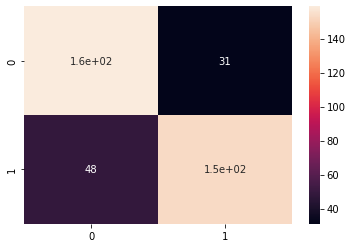

In [50]:
print(classification_report(y_val, preds))
cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

## Random Forest

In [51]:
random_forest = RandomForestClassifier(criterion= 'entropy', 
                                  max_depth= 10, 
                                  max_features= 'sqrt', 
                                  min_samples_leaf= 1, 
                                  min_samples_split= 3, 
                                  n_estimators= 140,
                                  random_state=42)

In [52]:
pipe_random_forest = make_pipeline(column_trans, random_forest)

In [53]:
pipe_random_forest.fit(X_train, y_train)
preds = pipe_random_forest.predict(X_val)

score_ranfor = pipe_random_forest.score(X_val, y_val)
print(score_ranfor)

0.8235294117647058


              precision    recall  f1-score   support

           0       0.78      0.88      0.83       190
           1       0.88      0.77      0.82       201

    accuracy                           0.82       391
   macro avg       0.83      0.83      0.82       391
weighted avg       0.83      0.82      0.82       391



<AxesSubplot:>

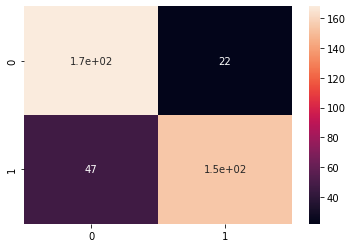

In [54]:
print(classification_report(y_val, preds))
cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

## Decision Tree

In [55]:
dtc = DecisionTreeClassifier(random_state=42)

In [56]:
pipe_dtc = make_pipeline(column_trans, dtc)

In [57]:
pipe_dtc.fit(X_train, y_train)
preds = pipe_dtc.predict(X_val)

score_dtc = pipe_dtc.score(X_val, y_val)
print(score_dtc)

0.907928388746803


              precision    recall  f1-score   support

           0       0.91      0.89      0.90       190
           1       0.90      0.92      0.91       201

    accuracy                           0.91       391
   macro avg       0.91      0.91      0.91       391
weighted avg       0.91      0.91      0.91       391



<AxesSubplot:>

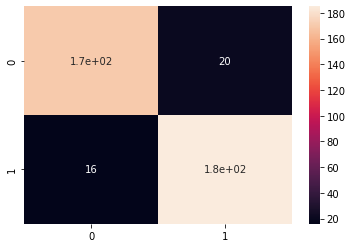

In [58]:
print(classification_report(y_val, preds))
cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

## K-Neighbours Classifier

In [59]:
knn = KNeighborsClassifier()

In [60]:
pipe_knn = make_pipeline(column_trans, knn)

In [61]:
pipe_knn.fit(X_train, y_train)
preds = pipe_knn.predict(X_val)

score_knn = pipe_knn.score(X_val, y_val)
print(score_knn)

0.6879795396419437


              precision    recall  f1-score   support

           0       0.67      0.71      0.69       190
           1       0.71      0.67      0.69       201

    accuracy                           0.69       391
   macro avg       0.69      0.69      0.69       391
weighted avg       0.69      0.69      0.69       391



<AxesSubplot:>

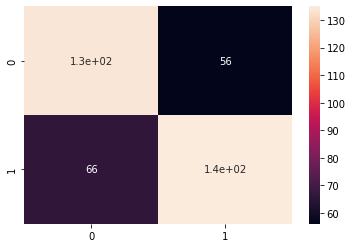

In [62]:
print(classification_report(y_val, preds))
cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

## Support Vector Machine

In [63]:
svc = SVC(random_state=42)

In [64]:
pipe_svc = make_pipeline(column_trans, svc)

In [65]:
pipe_svc.fit(X_train, y_train)
preds = pipe_svc.predict(X_val)

score_svm = pipe_svc.score(X_val, y_val)
print(score_svm)

0.8363171355498721


              precision    recall  f1-score   support

           0       0.80      0.89      0.84       190
           1       0.88      0.79      0.83       201

    accuracy                           0.84       391
   macro avg       0.84      0.84      0.84       391
weighted avg       0.84      0.84      0.84       391



<AxesSubplot:>

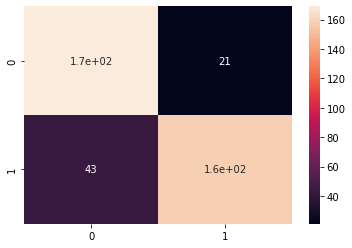

In [66]:
print(classification_report(y_val, preds))
cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

After training 5 different models, it seems that Decision Tree gives the best results.

In [67]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','SVM'],
    'Score' : [score_logreg, score_knn, score_dtc, score_ranfor, score_svm]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree,0.907928
4,SVM,0.836317
3,Random Forest,0.823529
0,Logistic Regression,0.797954
1,KNN,0.687980


# QUESTION 5

**predict_proba metoduyla oran nasıl hesaplanır ve treshold nasıl değiştirilir?**

In a classification problem, we may decide to directly estimate the class values.

Alternatively, it may be more flexible to estimate probabilities for each class instead. This is because it provides the ability to choose and even calibrate the threshold for how to interpret the predicted probabilities.

The difference between predict() and predict_proba() functions; In your studies using methods such as regression, classification, clustering, the predicted label information can be obtained with the predict function, if you want to obtain the probability of the observations belonging to the classes in classification problems, the predict_proba function should be used.

- The default threshold for interpreting probabilities into class labels is 0.5, and setting this hyperparameter is called ***threshold moving***.
- The Threshold value can be determined using the ROC curve.

Here, the logical regression model is chosen as an example.

In [68]:
#threshold değeri rastgele seçilerek predict_proba metodunun yazdırdığı olasılık değerleriyle karşılaştırılır.
threshold = 0.25
predictions = (pipe_log_reg.predict_proba(X_test)[:, 1] >= threshold).astype(int)

In [69]:
#mantıksal regresyon için test dataseti değerleri ölçülür. yukarıda train işlemleri tamamlanmıştı
preds = pipe_log_reg.predict(X_test)
score_logreg = pipe_log_reg.score(X_test, y_test)
print(score_logreg)

0.8092105263157895


In [70]:
#threshold belirlenmeden önceki değerler ve threshold belirlendikten sonraki değerler yazdırılır.
print('Valuation for test data only:')
print(classification_report(y_test, preds))
print("----------------------------------------------------------------------")
print('Valuation for test data only  (new_threshold):')
print(classification_report(y_test, predictions))

Valuation for test data only:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       226
           1       0.82      0.79      0.81       230

    accuracy                           0.81       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.81      0.81      0.81       456

----------------------------------------------------------------------
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       226
           1       0.74      0.88      0.80       230

    accuracy                           0.78       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.79      0.78      0.78       456



Although the threshold value determined accordingly decreased in the detection of 0s, it increased the fraud detection rate more than ever before.